In [1]:
import sys
import os
import tensorflow as tf
from itertools import product
import numpy as np
import yaml
import SimpleITK as sitk
from pathlib import Path
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


D:\comp30\RawData\Training\img\img0001.nii\ct.mha


c:\users\vmlab\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
c:\users\vmlab\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


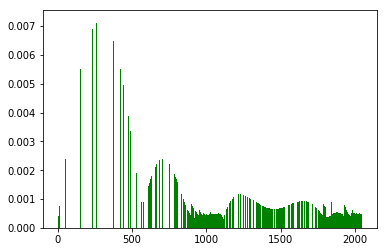

In [10]:

def histeq(data,nbr_bins = 2048):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = np.histogram(data,nbr_bins,normed= True)
    imhist=imhist#+0.75/2048

    #print("bins:",bins[:-1])
    cdf = imhist.cumsum()   #

    #print("cdf:",cdf)
    cdf = 2048.0 * cdf / cdf[-1]
    #print("cdf:",cdf)
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(data,bins[:-1],cdf)
    return im2,cdf



array_shape=[]
array_path=[]
array_originmax=[]
array_originmin=[]
array_histmax=[]
array_histmin=[]

i = 'img0001.nii'
filepath=os.path.join(r"D:\comp30\RawData\Training\img",i)
filepath=os.path.join(filepath,os.listdir(filepath)[0])
print(filepath)

image=sitk.ReadImage(filepath)    
inputimagearray=sitk.GetArrayFromImage(image)
'''
labelarry=inputimagearray
labelarry=labelarry.flatten()

labelarry=labelarry+1024
processed=[]
cleanarrayindex=[]
labelarry[labelarry < 1] = 0
labelarry[labelarry > 2048] = 2048
for index,elem in enumerate(labelarry):
    if elem != 0 :
        processed.append(elem)
        cleanarrayindex.append(index)

processed = np.array(processed,np.float32)
print(processed)
'''
data2,cdf = histeq(processed)


In [12]:
def histeq(data,nbr_bins = 2048):
    """对一幅灰度图像进行直方图均衡化"""
    #计算图像的直方图
    #在numpy中，也提供了一个计算直方图的函数histogram(),第一个返回的是直方图的统计量，第二个为每个bins的中间值
    imhist,bins = np.histogram(data,nbr_bins,normed= True)
    imhist=imhist#+0.75/2048

    #print("bins:",bins[:-1])
    cdf = imhist.cumsum()   #
    
    #print("cdf:",cdf)
    cdf = 2048.0 * cdf / cdf[-1]
    #print("cdf:",cdf)
    #使用累积分布函数的线性插值，计算新的像素值
    im2 = np.interp(data,bins[:-1],cdf)
    return im2,cdf


i = 'img0001.nii'
filepath=os.path.join(r"D:\comp30\RawData\Training\img",i)
filepath=os.path.join(filepath,os.listdir(filepath)[0])
print(filepath)

image=sitk.ReadImage(filepath)    
inputimagearray=sitk.GetArrayFromImage(image)

array_path.append(i)
array_shape.append(inputimagearray.shape)
array_originmax.append(np.max(inputimagearray))
array_originmin.append(np.min(inputimagearray))
    
    
labelarry=inputimagearray
labelarry=labelarry.flatten()

labelarry=labelarry+1024

processed=[]
cleanarrayindex=[]
labelarry[labelarry < 1] = 0
labelarry[labelarry > 2048] = 2048
for index,elem in enumerate(labelarry):
    if elem != 0 :
        processed.append(elem)
        cleanarrayindex.append(index)


data2,cdf = histeq(processed)

print(data2)

D:\comp30\RawData\Training\img\img0001.nii\ct.mha


c:\users\vmlab\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


[868.68150915 605.36595161 567.38804389 ... 460.84198627 177.93312366
  63.04481915]


In [12]:
filepath = r"D:\comp30\Script\patch_mask8\label28\image73.mha"
image=sitk.ReadImage(filepath)
inputimagearray=sitk.GetArrayFromImage(image)
inputimagearray.sum(0).sum(0).sum(0)

array([1724560,    5642,   46002,    4298,       0,  151586,   48150,
         40262,     684])